In [1]:
# PROJECT TASK OVERVIEW
#   Are the games getting better or worse?
#   Rating distribution over time
#   How many people have ranked games?
#
#   id is the same in the other datasets @id

In [2]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from matplotlib.ticker import FuncFormatter

In [4]:
# Reading in boardgame_ranks.csv file
csv_path = "../bggeek/boardgames_ranks.csv"

bgr = pd.read_csv(csv_path)
bgr.head()

,id,name,yearpublished,rank,bayesaverage,average,usersrated,abstracts_rank,cgs_rank,childrensgames_rank,familygames_rank,partygames_rank,strategygames_rank,thematic_rank,wargames_rank
0,224517,Brass: Birmingham,2018,1,8.41685,8.60150,43260,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1,161936,Pandemic Legacy: Season 1,2015,2,8.38483,8.53105,52509,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN
2,174430,Gloomhaven,2017,3,8.36715,8.60131,60981,NaN,NaN,NaN,NaN,NaN,4.0,2.0,NaN
3,342942,Ark Nova,2021,4,8.32949,8.53701,39439,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
4,233078,Twilight Imperium: Fourth Edition,2017,5,8.24177,8.60654,22745,NaN,NaN,NaN,NaN,NaN,5.0,3.0,NaN


In [5]:
bgr.columns

Index(['id', 'name', 'yearpublished', 'rank', 'bayesaverage', 'average',
       'usersrated', 'abstracts_rank', 'cgs_rank', 'childrensgames_rank',
       'familygames_rank', 'partygames_rank', 'strategygames_rank',
       'thematic_rank', 'wargames_rank'],
      dtype='object')

In [6]:
# Total User Ratings

total_ratings = bgr["usersrated"].sum()
print(f"Total User Ratings: {total_ratings:,}")

Total User Ratings: 27,760,008


In [179]:
# Getting a sample from the data
bgr_df = bgr[["id","name","yearpublished","rank","bayesaverage","average","usersrated"]]

sampled_bgr = bgr_df.iloc[:10000]

filtered_data = sampled_bgr[sampled_bgr["average"] > 0]
filtered_data

,id,name,yearpublished,rank,bayesaverage,average,usersrated
0,224517,Brass: Birmingham,2018,1,8.41685,8.60150,43260
1,161936,Pandemic Legacy: Season 1,2015,2,8.38483,8.53105,52509
2,174430,Gloomhaven,2017,3,8.36715,8.60131,60981
3,342942,Ark Nova,2021,4,8.32949,8.53701,39439
4,233078,Twilight Imperium: Fourth Edition,2017,5,8.24177,8.60654,22745
...,...,...,...,...,...,...,...
9995,339222,WolfWalkers: My Story,2021,9996,5.57006,7.18058,103
9996,239808,No Escape,2018,9997,5.57003,6.64709,153
9997,24078,Lightning: North Africa on to Tobruk!,2006,9998,5.57002,6.54027,148
9998,283795,Würfel-WG,2019,9999,5.57002,6.28667,220


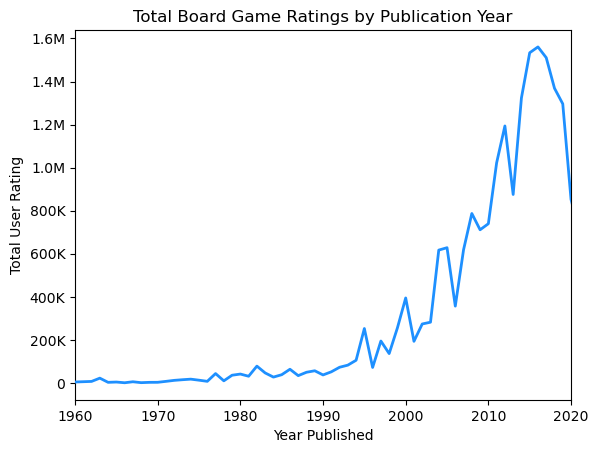

In [180]:
# Line plot for total user ratings by publication year

user_ratings = filtered_data.groupby("yearpublished")["usersrated"].sum()

def millions(x, pos):
    if x >= 1e6:    # If the values are in millions
        return '{:1.1f}M'.format(x*1e-6)
    elif x >= 1e3:  # If the values are in thousands
        return '{:1.0f}K'.format(x*1e-3)
    return str(int(x))


user_ratings.plot(kind="line", color="dodgerblue", linewidth=2, zorder=5)

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))

plt.title("Total Board Game Ratings by Publication Year")
plt.xlabel("Year Published")
plt.ylabel("Total User Rating")
plt.xlim([1960,2020])
plt.show()

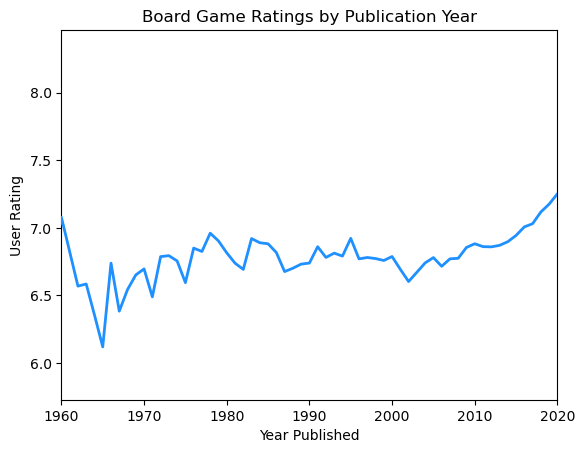

In [156]:
# Line plot for average user rating by publication year

year_average = filtered_data.groupby("yearpublished")["average"].mean()

year_average.plot(kind="line", color="dodgerblue", linewidth=2, zorder=5)

plt.title("Board Game Ratings by Publication Year")
plt.xlabel("Year Published")
plt.ylabel("User Rating")
plt.xlim([1960,2020])
plt.show()

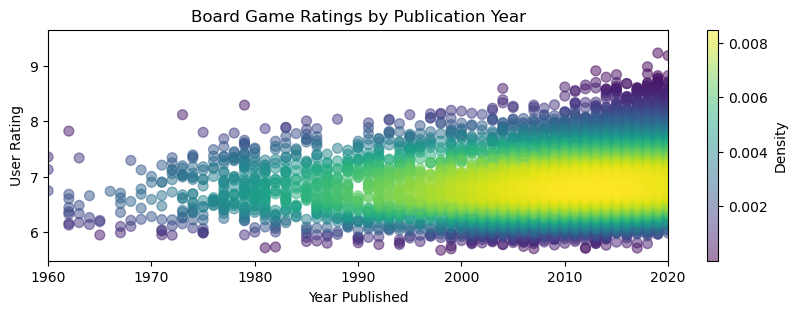

In [157]:
# Scatter plot using Gaussian KDE for density color scale

year_average = filtered_data.groupby("yearpublished")["average"].mean()

x = filtered_data["yearpublished"]
y = filtered_data["average"]

# Calculating point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

plt.figure(figsize=(10,3))
plt.scatter(x, y, c=z, s=50, alpha=0.5, cmap="viridis") 
plt.colorbar(label="Density")
plt.title("Board Game Ratings by Publication Year")
plt.xlabel("Year Published")
plt.ylabel("User Rating")
plt.xlim([1960,2020])
plt.show()

In [173]:
# Reading in cleaned.csv

cleaned = "../bggeek/cleaned.csv"

cleaned_df = pd.read_csv(cleaned)
cleaned_df.head()

,@type,@id,name,description,minplayers,maxplayers,poll,playingtime,minplaytime,maxplaytime,...,marketplacelistings,issueindex,year,categories,mechanics,family,implementation,designer,artist,publisher
0,boardgame,410001,Rosting Panic,&#228;&#184;&#128;&#228;&#186;&#186;&#227;&#12...,1,4,"[{'@name': 'suggested_numplayers', '@title': '...",10,5,10,...,NaN,NaN,2023,"['Dice', 'Economic', 'Real-time']",['Real-Time'],['Admin: Better Description Needed!'],[],['Syou (しょう)'],[],['Show House Games']
1,boardgame,410003,Shihou Dealer,Shihou Dealer is a trick-taking card game with...,3,4,"[{'@name': 'suggested_numplayers', '@title': '...",40,40,40,...,NaN,NaN,2023,['Card Game'],['Trick-taking'],['Admin: Better Description Needed!'],[],['新澤 大樹 (Taiki Shinzawa)'],[],['倦怠期 (Kentaiki)']
2,boardgame,410005,Los huevos,Los huevos (&quot;The eggs&quot;) is a fast-pa...,2,6,"[{'@name': 'suggested_numplayers', '@title': '...",15,5,15,...,NaN,NaN,2024,"['Deduction', 'Memory']","['Deduction', 'Memory', 'Push Your Luck', 'Set...",['Admin: Upcoming Releases'],[],['Gustavo Ramos Bustos'],['Gustavo Ramos Bustos'],['nrnnm']
3,boardgame,410006,Ein Junge und ein Riese,I went on a trip that day in search of ancient...,2,4,"[{'@name': 'suggested_numplayers', '@title': '...",30,30,30,...,NaN,NaN,2023,['Card Game'],['Trick-taking'],[],[],['Hayato Sato'],['でじ (decoctdesign)'],['Fourier Analysis (フーリエ解析)']
4,boardgame,410007,JEZZ,Quick hands are required in the card game JEZZ...,2,5,"[{'@name': 'suggested_numplayers', '@title': '...",10,5,10,...,NaN,NaN,2021,['Card Game'],[],['Admin: Better Description Needed!'],[],['Louis Maier'],['Louis Maier'],['Bund Regionalverband Südlicher Oberrhein']
